## 2022-02-17: Tests for Uniformity of Distributions on Unit Hyperspheres

*Last Updated*: 2022-02-20

### Authors
* Kevin Chu (kevin@velexi.com)

### Overview
In this Jupyter notebook, we explore tests for uniformity of distributions on unit hyperspheres.

### Methodology

* For several values of the spatial dimension, draw a sample of vectors from a multivariate normal distribution with unit covariance matrix and normalize each vector to have unit norm.

    * In 2D, we also perform (as a sanity check) the uniformity tests using a sample generated by drawing an angle $\theta$ from a uniform distribution on the interval $(-\pi, \pi)$.

* For each sample, perform the following three tests for uniformity of the distribution on the unit hypersphere.

    * Anderson-Darling Test
    
    * Kolmogorov-Smirnov Test (Exact)
    
    * Kolmogorov-Smirnov Test (Asymptotic)    

In [1]:
# --- Imports

import Distributions
using Distributions: MvNormal, Uniform, ContinuousUnivariateDistribution, cdf, pdf
using HypothesisTests
using LinearAlgebra
using Plots
using Random

### Tests for Uniformity of Distribution on a Circle

#### Sample Vectors Generated By Drawing $\theta$ from Uniform Distribution on $(-\pi, \pi)$

In [2]:
# --- Generate sample of vectors drawn from a uniform distribution on a unit circle

n = 2
num_samples_2d = 50000

dist = Uniform(-π, π)
num_vectors = num_samples_2d
theta = rand(dist, num_vectors)
vectors = transpose(hcat(cos.(theta), sin.(theta)));

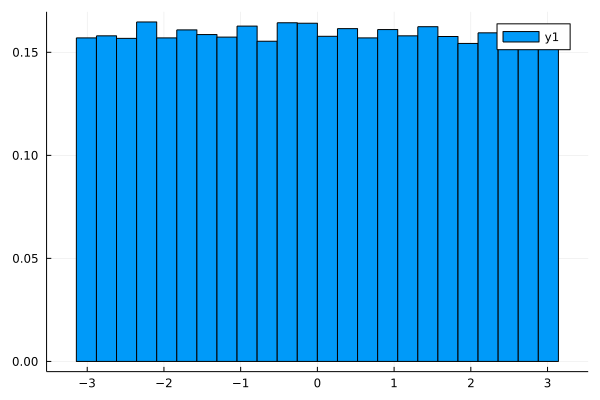

pdf(θ): 0.15915494309189535


In [3]:
# --- Plot histogram of angles

thetas = map(i -> atan(vectors[:, i][2], vectors[:, i][1]), 1:num_vectors)

num_hist_bins = 25
hist_bins = range(-π, π; length=num_hist_bins)
hist = histogram(thetas; bins=hist_bins, normalize=true)
plt = plot(hist)

pdf_2d = 0.5 / π
println("pdf(θ): $(pdf_2d)")

# Display plot
display(plt)

In [4]:
# --- Perform test for uniformity on the circle

# Analytical formula for distribution over angle from x-axis
struct ThetaDistribution2D <: ContinuousUnivariateDistribution end
Distributions.pdf(dist::ThetaDistribution2D, x::Real) = 0.5 / π
Distributions.cdf(dist::ThetaDistribution2D, x::Real) = 0.5 * (x + π) / π

theta_dist = ThetaDistribution2D()

# Perform Anderson-Darling Test
test_results = OneSampleADTest(thetas, theta_dist)
println(test_results)

test_results = ExactOneSampleKSTest(thetas, theta_dist)
println(test_results)

test_results = ApproximateOneSampleKSTest(thetas, theta_dist)
println(test_results)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.7057

Details:
    number of observations:   50000
    sample mean:              -0.0036082823227964267
    sample SD:                1.8094180584731476
    A² statistic:             0.540730016080932

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00341716

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.6035

Details:
    number of observations:   50000

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population deta

#### Sample Vectors Generated By Drawing Vectors from 2D Multivariate Normal Distribution

In [5]:
# --- Generate sample of vectors drawn from a uniform distribution on a unit circle

n = 2
num_samples_2d = 50000

# Generate vectors
dist = MvNormal(zeros(n), ones(n))
num_vectors = num_samples_2d
vectors = rand(dist, num_vectors)
for i = 1:num_vectors
    vectors[:, i] /= norm(vectors[:, i])
end

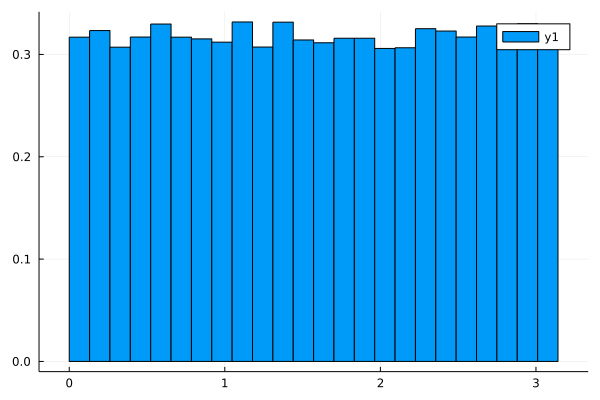

pdf(θ): 0.3183098861837907


In [6]:
# --- Plot histogram of angles

thetas = map(i -> atan(norm(vectors[:, i][2]), vectors[:, i][1]), 1:num_vectors)

num_hist_bins = 25
hist_bins = range(0, π; length=num_hist_bins)
hist = histogram(thetas; bins=hist_bins, normalize=true)
plt = plot(hist)

pdf_2d = 1 / π
println("pdf(θ): $(pdf_2d)")

# Display plot
display(plt)

In [7]:
# --- Perform test for uniformity on the circle

# Analytical formula for distribution over angle from x-axis
struct ThetaDistribution2D <: ContinuousUnivariateDistribution end
Distributions.pdf(dist::ThetaDistribution2D, x::Real) = 1 / π
Distributions.cdf(dist::ThetaDistribution2D, x::Real) = x / π

theta_dist = ThetaDistribution2D()

# Perform Anderson-Darling Test
test_results = OneSampleADTest(thetas, theta_dist)
println(test_results)

test_results = ExactOneSampleKSTest(thetas, theta_dist)
println(test_results)

test_results = ApproximateOneSampleKSTest(thetas, theta_dist)
println(test_results)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.3318

Details:
    number of observations:   50000
    sample mean:              1.574495579199642
    sample SD:                0.9093163306611904
    A² statistic:             1.05055078896002

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.0044317

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.2798

Details:
    number of observations:   50000

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:
  

### Tests for Uniformity of Distribution on a Sphere

In [8]:
# --- Generate sample of vectors drawn from a uniform distribution on a unit sphere

n = 3
num_samples_3d = 50000

# Generate vectors
dist = MvNormal(zeros(n), ones(n))
num_vectors = num_samples_3d
vectors = rand(dist, num_vectors)
for i = 1:num_vectors
    vectors[:, i] /= norm(vectors[:, i])
end

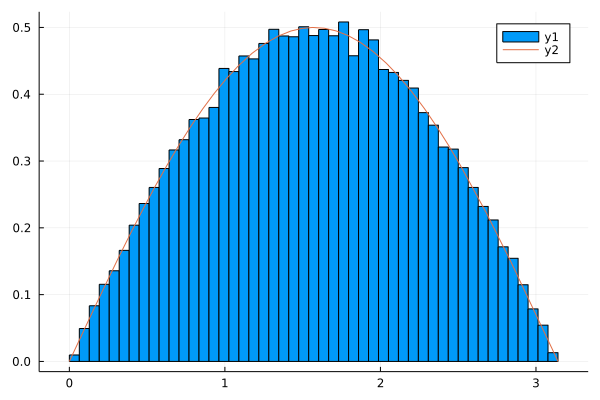

In [9]:
# --- Plot histogram of angles

thetas = map(i -> atan(norm(vectors[:, i][2:end]), vectors[:, i][1]), 1:num_vectors)

num_hist_bins = 50
hist_bins = range(0, π; length=num_hist_bins)
hist = histogram(thetas; bins=hist_bins, normalize=true)
plt = plot(hist)

pdf_3d(x) = 0.5 * sin(x)
plt = plot!(pdf_3d, 0, π)

# Display plot
display(plt)

In [10]:
# --- Perform test for uniformity on the sphere

# Analytical formula for distribution over angle from x-axis
struct ThetaDistribution3D <: ContinuousUnivariateDistribution end
Distributions.cdf(dist::ThetaDistribution3D, x::Real) = 0.5 * (1 - cos(x))

theta_dist = ThetaDistribution3D()

# Perform Anderson-Darling Test
test_results = OneSampleADTest(thetas, theta_dist)
println(test_results)

test_results = ExactOneSampleKSTest(thetas, theta_dist)
println(test_results)

test_results = ApproximateOneSampleKSTest(thetas, theta_dist)
println(test_results)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.6491

Details:
    number of observations:   50000
    sample mean:              1.5733841104823418
    sample SD:                0.684957920436637
    A² statistic:             0.5988384277384897

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00314779

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.7048

Details:
    number of observations:   50000

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population details:

### Tests for Uniformity of Distribution on an $n$-Dimensional Hypersphere

__Notes__

* For unit vectors uniformly distributed on an $n$-dimensional hypersphere, we can derive an analytical formula for the CDF $F(\theta)$ of the probability distribution over $\theta$ (the angle that the vector makes with the $x_1$-axis). The probability density $p(\theta)$ of vectors at an angle $\theta$ from the $x_1$-axis is proportional to the surface area of the $(n-2)$-dimensional hypersphere with radius $\sin(\theta)$. Therefore, the $p(\theta)$ is proportional to $\sin^{n-2}(\theta)$. To derive analytical expressions for $F(\theta)$, we can integrate $\sin^{n-2}(\theta)$ using the identity $\sin(\theta) = \frac{1}{2i}(e^{i \theta} - e^{-i \theta})$ to express $\sin^{n-2}(\theta)$ as a sum of terms that are straightforward to integrate:

$$
\sin^{k}(\theta)
= \frac{1}{(2i)^k} \sum_{j = 0}^k (-1)^{k-j} {k \choose j} e^{i (2j-k) \theta}
= \frac{1}{(2i)^k} \sum_{j = 0}^k (-1)^{j} {k \choose j} e^{i (k-2j) \theta}
$$


#### $n$ Even
      
When $k$ is even, $i^k = (-1)^{k/2}$ and the sums is symmetric about the center term $j = k/2$. Applying these observations, we find that
    
$$
\sin^{k}(\theta) 
= \frac{(-1)^{k/2}}{2^k} \sum_{j = 0}^k (-1)^{j} {k \choose j}
                         \frac{e^{i (k-2j) \theta} + e^{i (2j-k) \theta}}{2} \\
= \frac{(-1)^{k/2}}{2^k} \sum_{j = 0}^k (-1)^{j} {k \choose j} \cos((k-2j) \theta) \\
= \frac{(-1)^{k/2}}{2^k} \left(
    (-1)^{k/2} {k \choose k/2}
    + 2 \sum_{j = 0}^{k/2 - 1} (-1)^{j} {k \choose j}  \cos((k-2j) \theta)
    \right).
$$
      
Integrating this expression, we find that
      
$$
F(\theta)
= \frac{(-1)^{k/2}}{\pi {k \choose k/2}} \left(
    (-1)^{k/2} {k \choose k/2} \theta
    + 2 \sum_{j = 0}^{k/2 - 1} (-1)^{j}
        {k \choose j} \frac{\sin((k-2j) \theta)}{k-2j}
    \right)
$$

In [11]:
# --- Generate sample of vectors drawn from a uniform distribution on a unit sphere

n = 20
num_samples = 50000

# Generate vectors
dist = MvNormal(zeros(n), ones(n))
num_vectors = num_samples
vectors = rand(dist, num_vectors)
for i = 1:num_vectors
    vectors[:, i] /= norm(vectors[:, i])
end

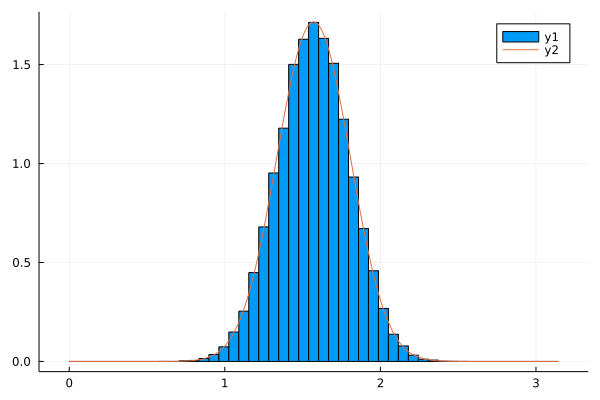

In [12]:
# --- Plot histogram of angles

thetas = map(i -> atan(norm(vectors[:, i][2:end]), vectors[:, i][1]), 1:num_vectors)

num_hist_bins = 50
hist_bins = range(0, π; length=num_hist_bins)
hist = histogram(thetas; bins=hist_bins, normalize=true)
plt = plot(hist)

pdf_nd(x) = (2^(n-2) / π / binomial(n-2, (n-2) ÷ 2)) * sin(x)^(n-2)
plt = plot!(pdf_nd, 0, π)

# Display plot
display(plt)

In [13]:
# --- Perform test for uniformity on the hypersphere

# Analytical formula for distribution over angle from x-axis
struct ThetaDistributionND <: ContinuousUnivariateDistribution end

function Distributions.cdf(dist::ThetaDistributionND, x::Real)
    k = n-2
    sgn = (-1)^(k÷2)
    value = 0
    for j = 0:(k÷2 - 1)
        value += (-1)^j * binomial(k, j) * sin((k - 2*j) * x) / (k - 2*j)
    end
    value *= 2
    value += sgn * binomial(k, k÷2) * x  # contribution from i = k÷2 term
    value *= sgn / π / binomial(k, k÷2)

    return value
end

theta_dist = ThetaDistributionND()

# Perform Anderson-Darling Test
test_results = OneSampleADTest(thetas, theta_dist)
println(test_results)

test_results = ExactOneSampleKSTest(thetas, theta_dist)
println(test_results)

test_results = ApproximateOneSampleKSTest(thetas, theta_dist)
println(test_results)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.8610

Details:
    number of observations:   50000
    sample mean:              1.5710731581932451
    sample SD:                0.2301684402704591
    A² statistic:             0.3875791006132804

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00266423

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8699

Details:
    number of observations:   50000

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population details

#### $n$ Odd

When $k$ is odd, the $j$-th and $(k-j)$-th terms have opposite signs, so we find that
    
$$
\sin^{k}(\theta) 
= \frac{1}{(2i)^k} \sum_{j = 0}^k (-1)^{j} {k \choose j}
                   \frac{e^{i (k-2j) \theta} - e^{i (2j-k) \theta}}{2} \\
= \frac{(-1)^{(k-1)/2}}{2^k} \sum_{j = 0}^k (-1)^{j} {k \choose j}
                             \frac{e^{i (k-2j) \theta} - e^{i (2j-k) \theta}}{2i} \\
= \frac{(-1)^{(k-1)/2}}{2^k} \sum_{j = 0}^k (-1)^{j} {k \choose j} \sin((k-2j) \theta).
$$
      
Integrating this expression, we find that

$$
F(\theta) = \frac{1}{N} \sum_{j = 0}^k (-1)^{j} {k \choose j} \frac{1 - \cos((k-2j) \theta)}{k-2j}
$$
      
where

$$
N = 2 \left( \sum_{j = 0}^k (-1)^{j} {k \choose j} \left( \frac{1}{k-2j} \right) \right).
$$

Noting that the $j$-th and $(k-j)$-th terms in the sum are identical, we can derive an alternate expression for
$F(\theta)$ involving half the number of terms:

$$
F(\theta) = \frac{1}{N^{\dagger}} 
            \sum_{j = 0}^{(k-1)/2} (-1)^{j} {k \choose j} \frac{1 - \cos((k-2j) \theta)}{k-2j}
$$
      
where the normalization factor $N^{\dagger} = N / 2$ and can also be computed directly using only half the number of terms:

$$
N^{\dagger} = 2 \left( \sum_{j = 0}^{(k-1)/2} (-1)^{j} {k \choose j} \left( \frac{1}{k-2j} \right) \right).
$$


In [14]:
# --- Generate sample of vectors drawn from a uniform distribution on a unit sphere

n = 45
num_samples = 50000

# Generate vectors
dist = MvNormal(zeros(n), ones(n))
num_vectors = num_samples
vectors = rand(dist, num_vectors)
for i = 1:num_vectors
    vectors[:, i] /= norm(vectors[:, i])
end

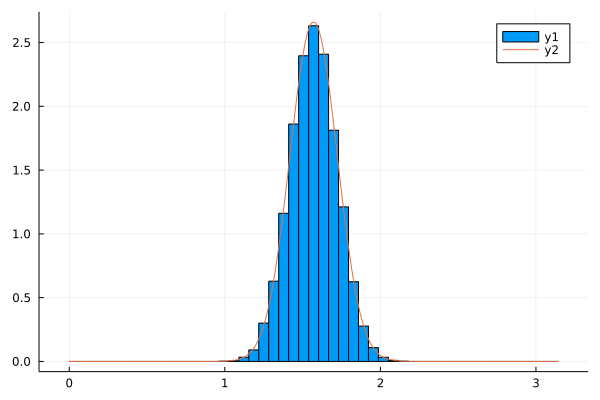

In [15]:
# --- Plot histogram of angles

thetas = map(i -> atan(norm(vectors[:, i][2:end]), vectors[:, i][1]), 1:num_vectors)

num_hist_bins = 50
hist_bins = range(0, π; length=num_hist_bins)
hist = histogram(thetas; bins=hist_bins, normalize=true)
plt = plot(hist)

pdf_nd(x) = (2^(n-2) / π / binomial(n-2, (n-2) ÷ 2)) * sin(x)^(n-2)
plt = plot!(pdf_nd, 0, π)

# Display plot
display(plt)

In [16]:
# --- Perform test for uniformity on the hypersphere

# Analytical formula for distribution over angle from x-axis
struct ThetaDistributionND <: ContinuousUnivariateDistribution end

function Distributions.cdf(dist::ThetaDistributionND, x::Real)
    k = n-2
    value = 0
    norm_ = 0
    for j = 0:(k-1)÷2
        coef = (-1)^j * binomial(k, j) / (k - 2*j)
        value += coef * (1 - cos((k - 2*j) * x))
        norm_ += coef
    end
    value /= 2 * norm_

    return value
end

theta_dist = ThetaDistributionND()

# Perform Anderson-Darling Test
test_results = OneSampleADTest(thetas, theta_dist)
println(test_results)

test_results = ExactOneSampleKSTest(thetas, theta_dist)
println(test_results)

test_results = ApproximateOneSampleKSTest(thetas, theta_dist)
println(test_results)

One sample Anderson-Darling test
--------------------------------
Population details:
    parameter of interest:   not implemented yet
    value under h_0:         NaN
    point estimate:          NaN

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.8713

Details:
    number of observations:   50000
    sample mean:              1.5711107278925753
    sample SD:                0.1503565202011595
    A² statistic:             0.3769370404375577

Exact one sample Kolmogorov-Smirnov test
----------------------------------------
Population details:
    parameter of interest:   Supremum of CDF differences
    value under h_0:         0.0
    point estimate:          0.00256708

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8967

Details:
    number of observations:   50000

Approximate one sample Kolmogorov-Smirnov test
----------------------------------------------
Population details